In [1]:
from zipfile import ZipFile
from IPython.display import FileLink, FileLinks

import time
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import statistics as stats
import numpy as np
from scipy.stats import mstats
import itertools

from statsmodels.stats.weightstats import ttest_ind as ttest

from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets, metrics

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

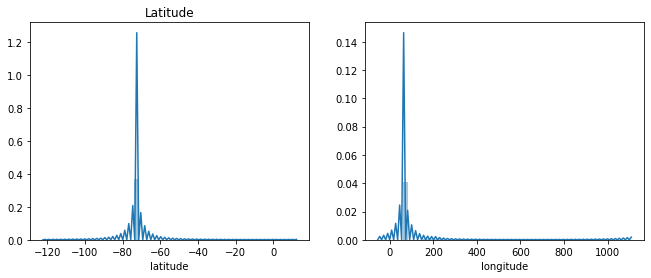

In [30]:
path = ('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/'+
        'sensing/gps/gps.zip')
zip_file = ZipFile(path)

dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
for df in dfs:
    bt_df = dfs[df]
    bt_df['uid'] = df

gps = pd.concat([dfs[df] for df in dfs],
                     sort=False).drop(columns=['Unnamed: 0'])

gps.longitude = gps.longitude + 64.86209718142184

plt.figure(figsize=(11,4))
plt.subplot(121)
sns.distplot(gps.latitude)
plt.title('Latitude')
plt.subplot(122)
sns.distplot(gps.longitude)
plt.show()

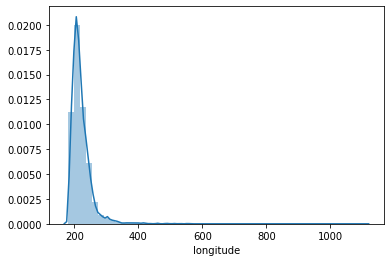

In [31]:
sns.distplot(gps.loc[gps.longitude > 180, 'longitude'])

In [32]:
max(gps.longitude)

1108.6621460114218

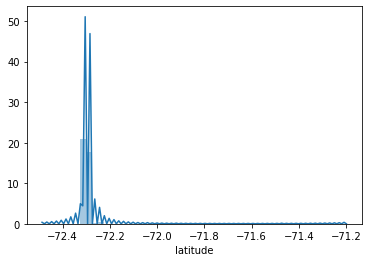

In [24]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/gps/gps_u45.csv'
gps_u39 = pd.read_csv(path)
sns.distplot(gps_u39.latitude)

In [17]:
gps.longitude

1364410654      0.000000
1364411866      0.000000
1364852743      0.000000
1364853942      0.000000
1364854001    199.399994
                 ...    
1370057807      0.000000
1370058153      0.000000
1370058408      0.000000
1370058753      0.000000
1370059008      0.000000
Name: longitude, Length: 202877, dtype: float64

# GPS

In [3]:
rauner_library = gps[(gps.latitude > 43.704250) &
                     (gps.latitude < 43.704657) &
                     (gps.longitude > -72.288446) &
                     (gps.longitude < -72.288009)]

(array([2.100e+01, 1.240e+02, 2.820e+02, 2.620e+02, 6.660e+02, 1.312e+03,
        6.200e+02, 1.000e+00, 9.700e+01, 4.100e+01]),
 array([-72.292898, -72.291866, -72.290834, -72.289802, -72.28877 ,
        -72.287738, -72.286706, -72.285674, -72.284642, -72.28361 ,
        -72.282578]),
 <a list of 10 Patch objects>)

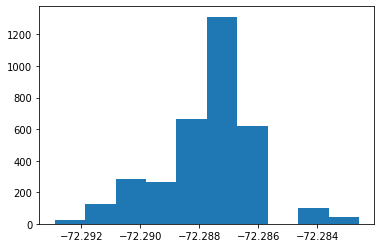

In [4]:
plt.hist(gps.latitude[(gps.latitude > -72.3) & (gps.latitude <-72.28)])

(array([3.8e+03, 1.0e+00, 6.0e+00, 1.9e+01, 2.1e+01]),
 array([-16.29999924,  23.48000183,  63.2600029 , 103.04000397,
        142.82000504, 182.6000061 ]),
 <a list of 5 Patch objects>)

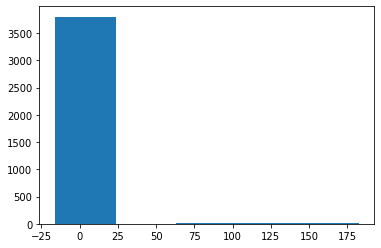

In [5]:
plt.hist(gps.longitude, bins = 5)

In [6]:
gps.provider.unique()

array(['wifi', nan], dtype=object)

# Wifi Location

In [7]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/wifi_location/wifi_location.zip'
zip_file = ZipFile(path)

dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

In [8]:
wifi_location = pd.concat([dfs[df] for df in dfs],
                         sort=False)

# Bluetooth

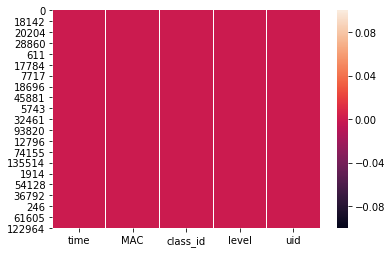

In [15]:
path = ('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/'+
        'sensing/bluetooth/bluetooth.zip')
zip_file = ZipFile(path)

dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
for df in dfs:
    bt_df = dfs[df]
    bt_df['uid'] = df

bluetooth = pd.concat([dfs[df] for df in dfs],
                     sort=False).drop(columns=['Unnamed: 0'])
sns.heatmap(bluetooth.isnull())

In [ ]:
blue

In [10]:
bt_u00 = bluetooth[bluetooth.uid=='bt_u00.csv']

In [11]:
uid_series = pd.Series(bluetooth.uid.unique())
connections_df = pd.DataFrame({'uid': uid_series})
connections_df['num'] = np.nan

In [12]:
for student in uid_series:
    student_data = bluetooth[bluetooth.uid==student]
    student_data_vc = student_data.MAC.value_counts()
    num = len([loc for loc in student_data_vc if loc > 50])
    connections_df.loc[connections_df.uid == student, 'num'] = num

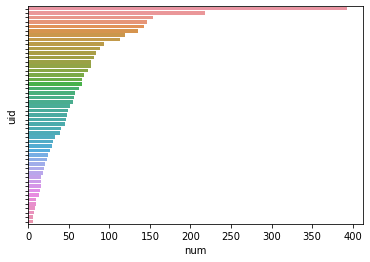

In [13]:
connections_df = connections_df.sort_values(by='num', ascending=False)
bplot=sns.barplot(x=connections_df.num,
                  y=connections_df.uid,
                  orient='h')
bplot.set_yticklabels([])
plt.show()

In [14]:
name = 'bt_frequency.csv'
connections_df.to_csv(name, index=False)
display(FileLink(path))

/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/bluetooth/bluetooth.zip

In [ ]:
import os
os.remove(csv_file_name)